# 1. Explorary Data Analysis

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,make_scorer
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('city_day.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Masih banyak yang null, maka dari itu perlu di benahi, akan tetapi , kita coba untuk lihat persebaran datanya terlebih dahulu

Tidak lupa, Air Quality Index hanya dipengaruhi oleh beberapa faktor yang telah ditetapkan, yaitu :
PM2.5, PM10, SO2, NOx, NH3, CO, O3. Serta, kita hapus `AQI_Bucket` terlebih dahulu , karena kita hanya butuh target column yaitu `AQI`

In [4]:
df.drop(axis=1,labels=['City','Date','NO','NO2','Benzene','Toluene','Xylene','AQI_Bucket'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   24933 non-null  float64
 1   PM10    18391 non-null  float64
 2   NOx     25346 non-null  float64
 3   NH3     19203 non-null  float64
 4   CO      27472 non-null  float64
 5   SO2     25677 non-null  float64
 6   O3      25509 non-null  float64
 7   AQI     24850 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


## Data distribution

In [6]:
df_num = df.select_dtypes(exclude=object)
num_columns = df_num.columns.tolist()

In [7]:
num_columns

['PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']

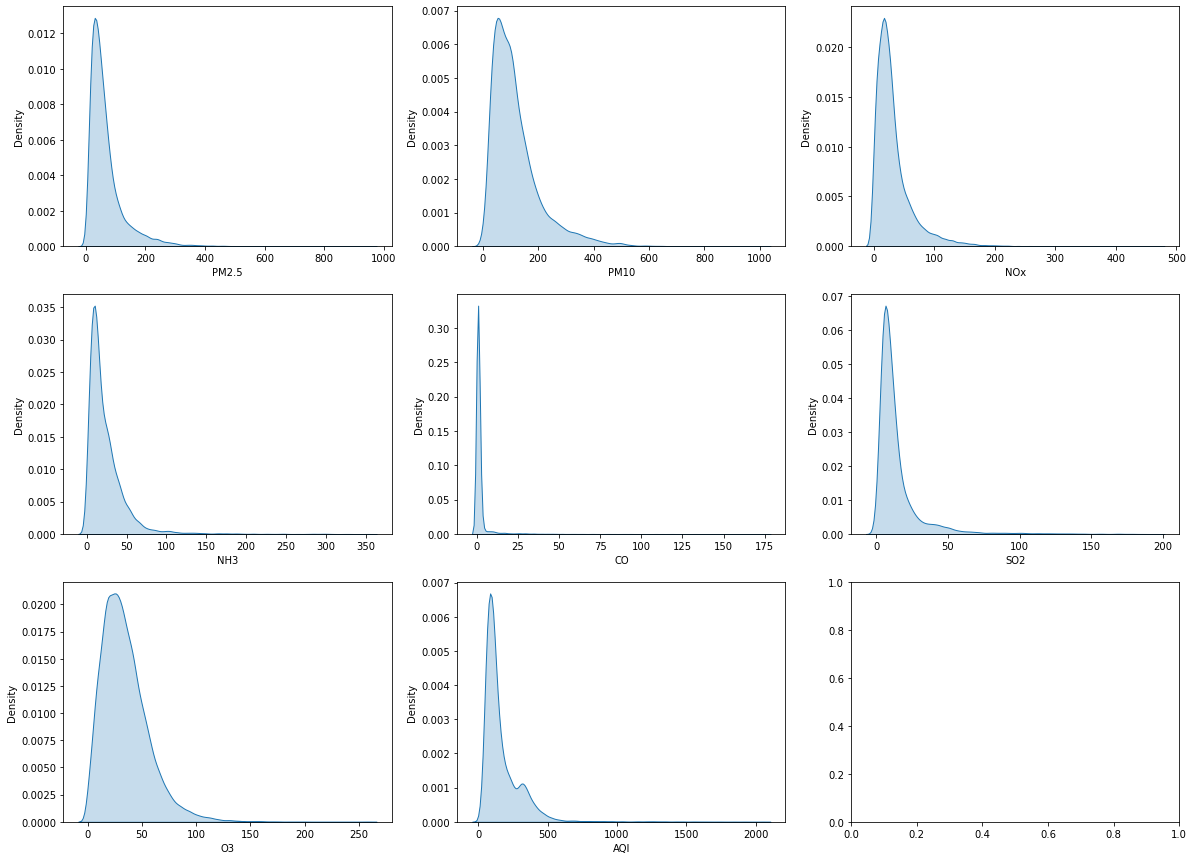

In [8]:
i=0
j=0

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for item in df_num.columns.tolist():
    sns.kdeplot(data=df[num_columns],x=item,ax=axes[i][j],fill=True)
    j+=1
    if j>2:
        j=0
        i+=1
        if i>2:
            break

Terlihat bahwa hasil menunjukkan skew, kita coba juga menggunakan df histogram

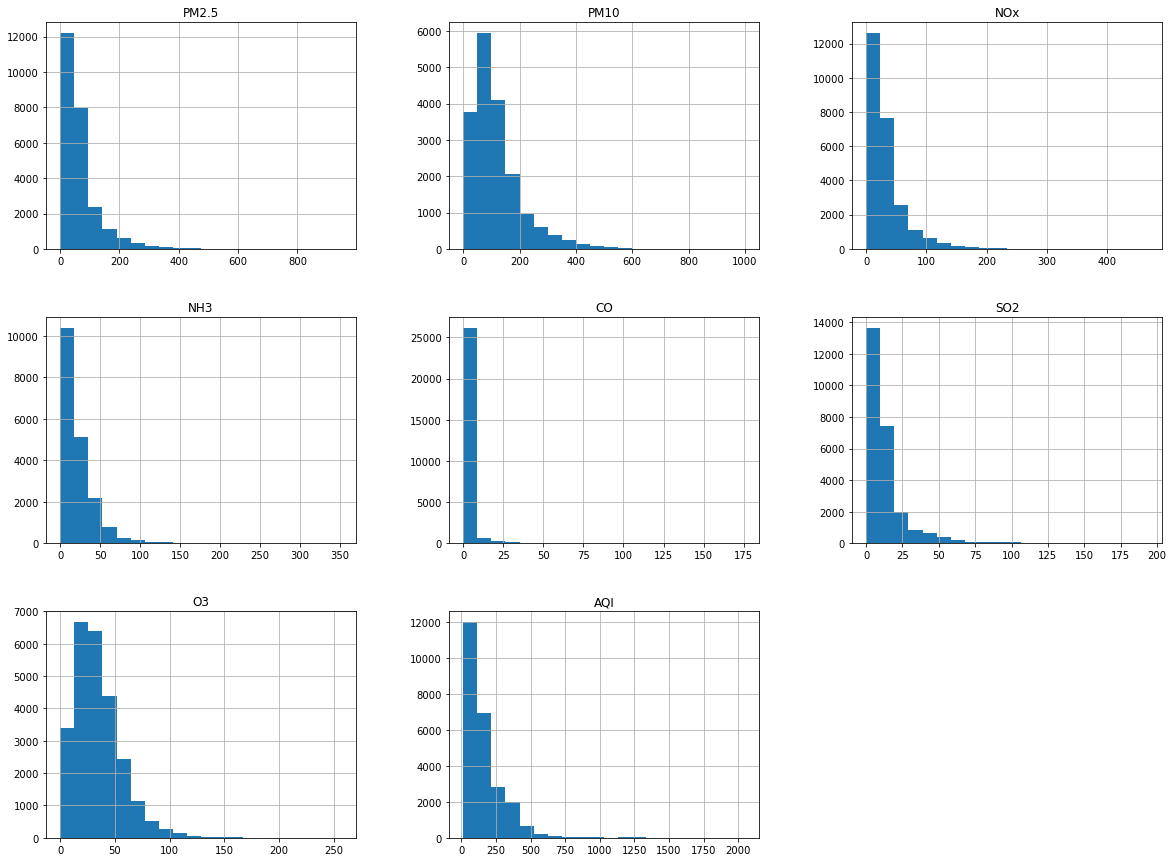

In [9]:
df[num_columns].hist(bins=20,figsize=(20,15))
plt.show()

Kita coba gunakan persebaran lain menggunakan seaborn boxplot

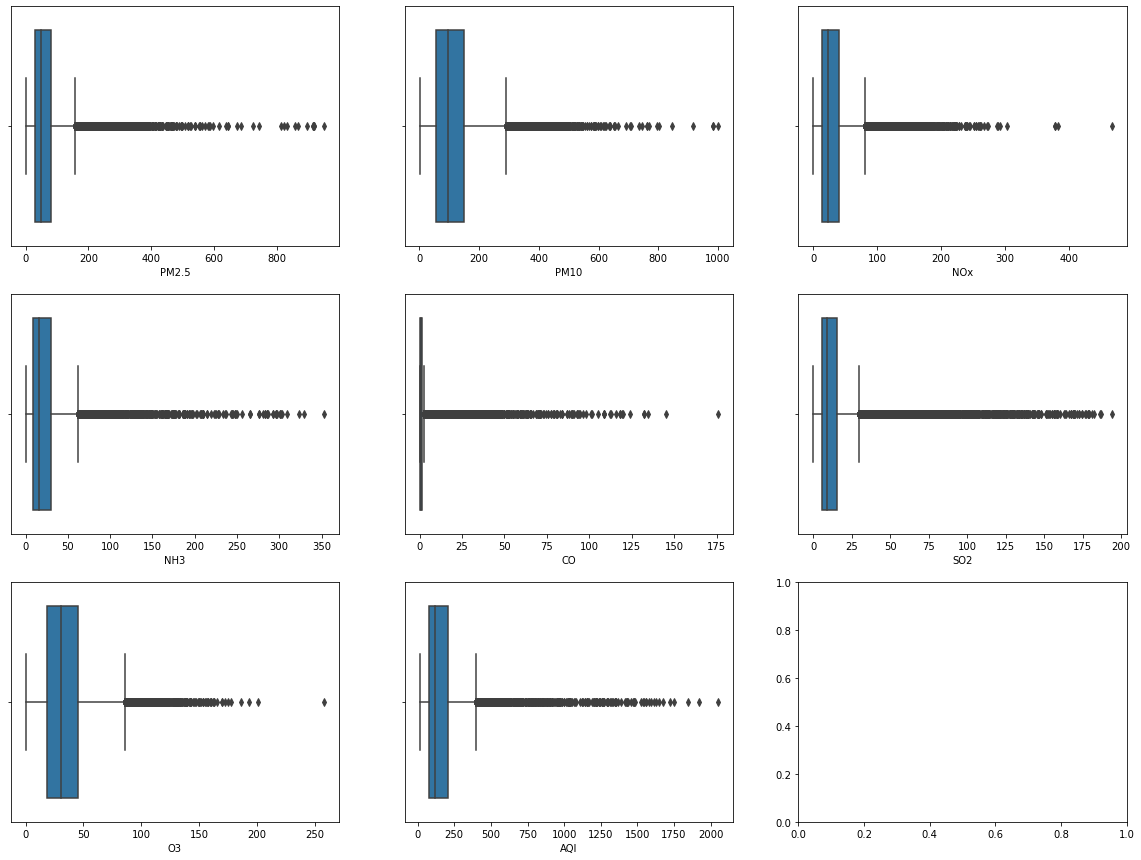

In [10]:
i=0
j=0

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for item in df_num.columns.tolist():
    sns.boxplot(data=df[num_columns],x=item,ax=axes[i][j])
    j+=1
    if j>2:
        j=0
        i+=1
        if i>2:
            break

Kita periksa skewnessnya, berapa nilai skew nya

In [11]:
for item in num_columns:
    print(f'Kolom {item}: {df[item].skew()}')

Kolom PM2.5: 3.3699598508656305
Kolom PM10: 2.0531890996443773
Kolom NOx: 2.5699146172425547
Kolom NH3: 4.083993435995748
Kolom CO: 8.87832152174809
Kolom SO2: 4.083659554753711
Kolom O3: 1.330119322144908
Kolom AQI: 3.3967571978481037


Kita lihat jumlah distribusi data untuk fitur object

In [12]:
cat_columns = df.select_dtypes(include=object)
cat_columns

""
0
1
2
3
4
...
29526
29527
29528
29529


## Null Percentage

In [13]:
for item in df.columns.tolist():
    percentage = df[item].isna().sum(axis=0)/len(df[item])
    print(f'Percentage null of {item} %.2f '%(percentage))

Percentage null of PM2.5 0.16 
Percentage null of PM10 0.38 
Percentage null of NOx 0.14 
Percentage null of NH3 0.35 
Percentage null of CO 0.07 
Percentage null of SO2 0.13 
Percentage null of O3 0.14 
Percentage null of AQI 0.16 


Kita lihat bahwa pada data mentah terdapat fitur numerik yang secara keseluruhan kosong, sehingga tidak bijak jika semuanya diisi menggunakan median. 

Sehingga, yang seluruh fitur numeriknya kosong, kita lihat jumlahnya, dan kita coba eliminasi.

In [14]:
df[num_columns].isna().all(axis=1).sum()

1522

Ada 1522 baris data yang fitur numeriknya kosong, kita coba eliminasi saja karena tidak bisa memanfaatkan data ini untuk diisi semua fiturnya dengan median masing - masing kolom (fitur)

In [15]:
df = df.dropna(subset=num_columns,how='all')

In [16]:
df.dropna(subset=num_columns,how='all',inplace=True)

In [17]:
df.reset_index().drop(axis=1,labels='index')

,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI
0,NaN,NaN,17.15,NaN,0.92,27.64,133.36,NaN
1,NaN,NaN,16.46,NaN,0.97,24.55,34.06,NaN
2,NaN,NaN,29.70,NaN,17.40,29.07,30.70,NaN
3,NaN,NaN,17.97,NaN,1.70,18.59,36.08,NaN
4,NaN,NaN,37.76,NaN,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...,...
28004,15.02,50.94,19.54,12.47,0.47,8.55,23.30,41.0
28005,24.38,74.09,16.53,11.99,0.52,12.72,30.14,70.0
28006,22.91,65.73,18.33,10.71,0.48,8.42,30.96,68.0
28007,16.64,49.97,18.80,10.03,0.52,9.84,28.30,54.0


In [18]:
for item in df.columns.tolist():
    percentage = df[item].isna().sum(axis=0)/len(df[item])
    print(f'Percentage null of {item} %.2f '%(percentage))

Percentage null of PM2.5 0.11 
Percentage null of PM10 0.34 
Percentage null of NOx 0.10 
Percentage null of NH3 0.31 
Percentage null of CO 0.02 
Percentage null of SO2 0.08 
Percentage null of O3 0.09 
Percentage null of AQI 0.11 


# 2. Handling Outlier

In [19]:
def upper_limit(data_name, column_name):
    Q1 = data_name[column_name].quantile(0.25)
    Q3 = data_name[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 3*IQR
    return upper_limit

Kita lihat, ada berapa jumlah serta persentase extreme outlier yang dihasilkan oleh masing - masing kolom

In [20]:
for item in num_columns:
    extreme_outlier = upper_limit(df,item)
    number_of_outliers = len(df[df[item]>extreme_outlier])

    print(f"Number of extreme outlier in {item}: ",number_of_outliers)

    outlier_percentage = number_of_outliers/len(df[item])

    print(f"Percentage of outlier in {item}: %.2f" %(outlier_percentage))


Number of extreme outlier in PM2.5:  721
Percentage of outlier in PM2.5: 0.03
Number of extreme outlier in PM10:  216
Percentage of outlier in PM10: 0.01
Number of extreme outlier in NOx:  633
Percentage of outlier in NOx: 0.02
Number of extreme outlier in NH3:  410
Percentage of outlier in NH3: 0.01
Number of extreme outlier in CO:  1802
Percentage of outlier in CO: 0.06
Number of extreme outlier in SO2:  1418
Percentage of outlier in SO2: 0.05
Number of extreme outlier in O3:  89
Percentage of outlier in O3: 0.00
Number of extreme outlier in AQI:  320
Percentage of outlier in AQI: 0.01


Untuk masing - masing extreme outlier, kita lihat apakah mempengaruhi hasil AQI, atau tidak

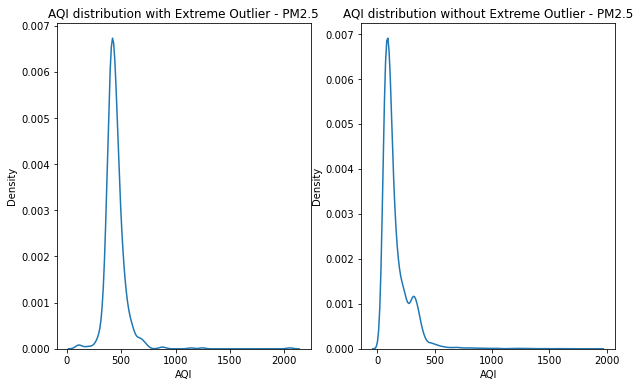

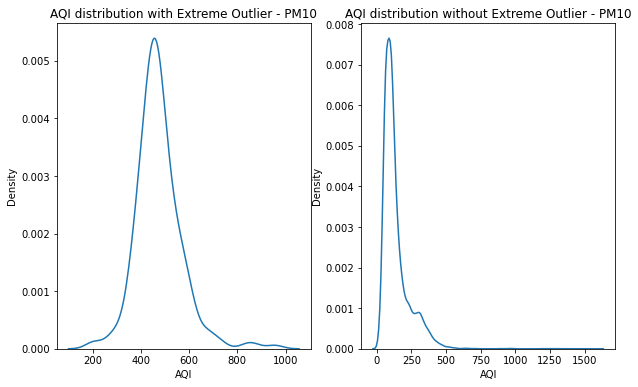

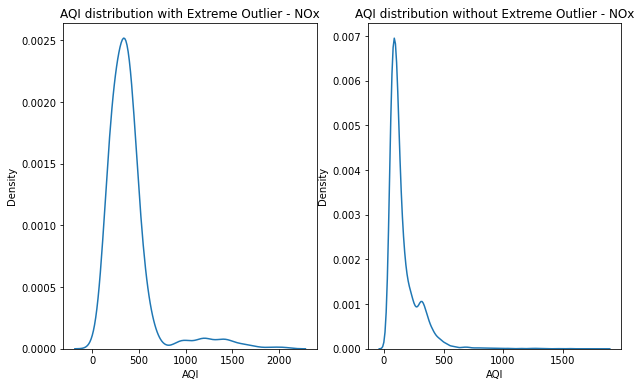

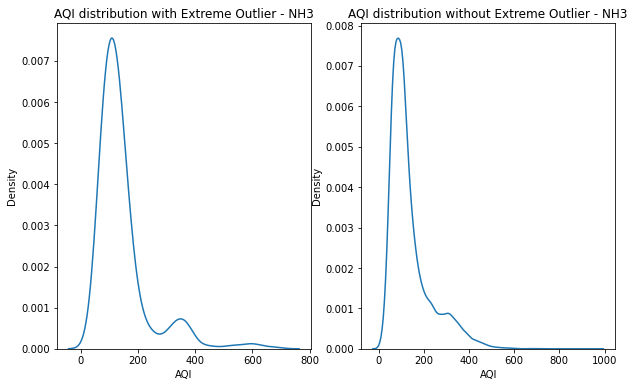

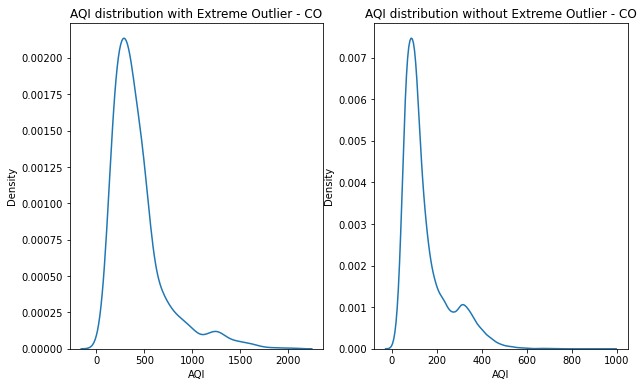

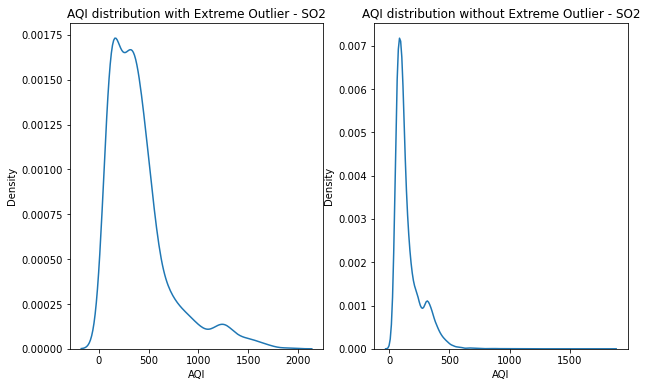

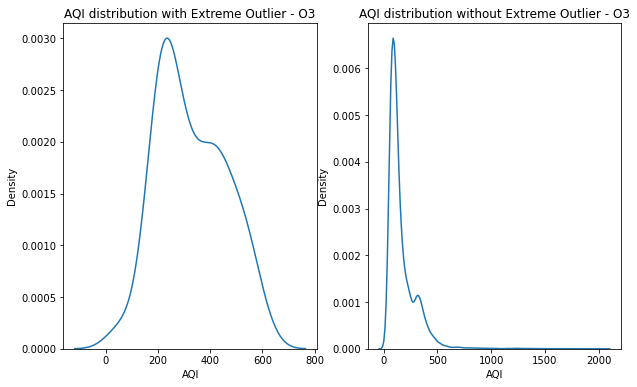

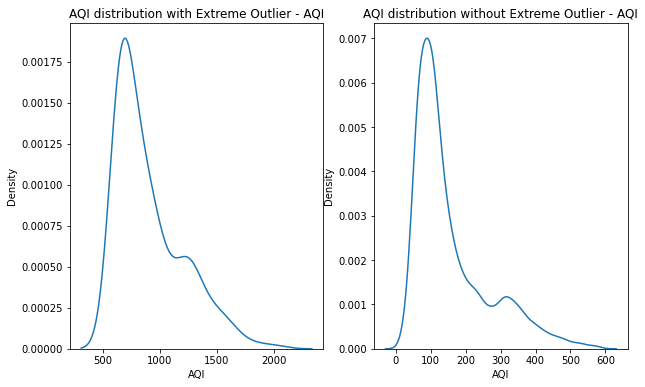

In [21]:
from locale import normalize


for item in num_columns:
    extreme_outlier = upper_limit(df,item)
    df_filter_extreme = df[df[item]>extreme_outlier]
    df_filter_noextreme = df[df[item]<extreme_outlier]
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    sns.kdeplot(data=df_filter_extreme,x='AQI',ax=ax1)
    sns.kdeplot(data=df_filter_noextreme,x='AQI',ax=ax2)
    ax1.title.set_text(f"AQI distribution with Extreme Outlier - {item}")
    ax2.title.set_text(f"AQI distribution without Extreme Outlier - {item}")
    plt.show()


Terlihat bahwa dari gambar , yang memiliki nilai feature dengan ekstrim, maka menghasilkan persebaran data AQI yang ekstrim juga, sehingga outlier ini masih berada dalam batas wajar, karena berbanding lurus dengan persebaran AQI yang dihasilkan. 

Extreme outlier dapat dieliminasi jika menimbulkan bias, dengan bias yang dimaksud ialah antara **nilai fitur yang ekstrim, namun tidak menghasilkan persebaran AQI yang tinggi juga** `

# 3. Handling Missing Values

Untuk masing - masing missing values yang terkandung pada fitur, dapat kita lakukan input dengan cara menggunakan imputer median, dikarenakan seluruh fitur yang berdistribusi skew.

Akan tetapi, kita akan eliminasi kolom yang **mengandung nan atau missing values pada kolom AQI**

In [22]:
df.dropna(subset=['AQI'],inplace=True)
df

,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI
28,83.13,NaN,33.72,NaN,6.93,49.52,59.76,209.0
29,79.84,NaN,41.08,NaN,13.85,48.49,97.07,328.0
30,94.52,NaN,52.61,NaN,24.39,67.39,111.33,514.0
31,135.99,NaN,84.57,NaN,43.48,75.23,102.70,782.0
32,178.33,NaN,72.80,NaN,54.56,55.04,107.38,914.0
...,...,...,...,...,...,...,...,...
29526,15.02,50.94,19.54,12.47,0.47,8.55,23.30,41.0
29527,24.38,74.09,16.53,11.99,0.52,12.72,30.14,70.0
29528,22.91,65.73,18.33,10.71,0.48,8.42,30.96,68.0
29529,16.64,49.97,18.80,10.03,0.52,9.84,28.30,54.0


In [23]:
df = df.reset_index().drop(labels=['index'],axis=1)

Setelah menghapus missing values yang terkandung pada kolom AQI, kita gunakan imputer untuk menginput missing values pada masing - masing kolom menggunakan median

In [24]:
X = df.drop(labels=['AQI'],axis=1)
y = df['AQI']

In [25]:
num_columns.remove('AQI')

In [26]:
X.shape

(24850, 7)

## Train Test Split

Sebelum melakukan handling missing values dan outlier, kita seharusnya melakukan splitting data terlebih dahulu untuk memisahkan antara data train dan test sehingga tidak terjadi `data leakage`

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=46)

In [28]:
X_train.shape,X_test.shape

((19880, 7), (4970, 7))

In [31]:
y_train.shape,y_test.shape

((19880,), (4970,))

In [33]:
median_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
minmax_scaler = MinMaxScaler()

numerical_pipeline = Pipeline(
    steps=
    [
        ("median_imputer",median_imputer),
        ("minmaxscaler",minmax_scaler)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_preprocessing",numerical_pipeline,num_columns)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [35]:
X_train.shape,y_train.shape

((19880, 7), (19880,))

In [36]:
X_test.shape,y_test.shape

((4970, 7), (4970,))

# 4. Model Definition (Base Model)

In [38]:
linreg = LinearRegression()

# 5. Model Training

In [39]:
linreg.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = linreg.predict(X_test)

In [44]:
y_test.head(5).tolist()

[68.0, 70.0, 144.0, 49.0, 97.0]

In [47]:
y_pred[:4]

array([ 77.42191225,  67.04401614, 165.39827276,  85.4427261 ])

# 6. Model Evaluation

### Mean Squared Error

In [49]:
print("MSE dari baseline model linear regression: ",mean_squared_error(y_test,y_pred))

MSE dari baesline model linear regression:  3612.501835759059


### Mean Absolute Error

In [50]:
print("MAE dari baseline model linear regression: ",mean_absolute_error(y_test,y_pred))

MAE dari baesline model linear regression:  34.23290276218261


### R-Square

In [52]:
print("R-Square dari baseline model linear regression: ",r2_score(y_test,y_pred))

R-Square dari baesline model linear regression:  0.8227925199455436


In [53]:
d = {'y_test':y_test,'y_pred':y_pred}
df_y = pd.DataFrame(data=d)

In [56]:
df_y= df_y.reset_index().drop(labels=['index'],axis=1)
df_y

,y_test,y_pred
0,68.0,77.421912
1,70.0,67.044016
2,144.0,165.398273
3,49.0,85.442726
4,97.0,114.601431
...,...,...
4965,104.0,100.604261
4966,96.0,103.305502
4967,96.0,129.366252
4968,355.0,396.872867


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

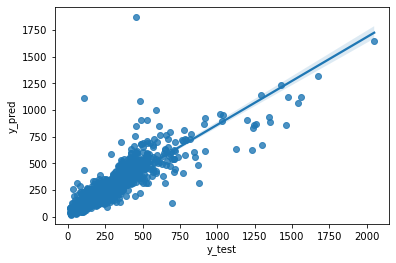

In [57]:
sns.regplot(x="y_test",y="y_pred",data=df_y)

# 7. Using other Model : GradientBoostingRegressor

In [59]:
gbr = GradientBoostingRegressor()

In [60]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [62]:
y_pred_gbr = gbr.predict(X_test)

### Mean Squared Error

In [63]:
print("MSE dari baseline model gradient boosting regressor : ",mean_squared_error(y_test,y_pred_gbr))

MSE dari baseline model gradient boosting regressor :  2655.3828416022757


### Mean Absolute Error

In [64]:
print("MAE dari baseline model gradient boosting regressor : ",mean_absolute_error(y_test,y_pred_gbr))

MAE dari baseline model gradient boosting regressor :  28.638130691022482


### R-Square

In [65]:
print("R-Square dari baseline model gradient boosting regressor : ",r2_score(y_test,y_pred_gbr))

R-Square dari baseline model gradient boosting regressor :  0.8697429860706747


In [66]:
d_gbr = {'y_test':y_test,'y_pred_gbr':y_pred_gbr}
df_y_gbr = pd.DataFrame(data=d_gbr)

In [67]:
df_y_gbr = df_y_gbr.reset_index().drop(labels=['index'],axis=1)
df_y_gbr

,y_test,y_pred_gbr
0,68.0,101.743415
1,70.0,79.015370
2,144.0,150.739635
3,49.0,72.162443
4,97.0,106.355414
...,...,...
4965,104.0,90.164956
4966,96.0,93.474730
4967,96.0,120.826635
4968,355.0,391.922224


<AxesSubplot:xlabel='y_test', ylabel='y_pred_gbr'>

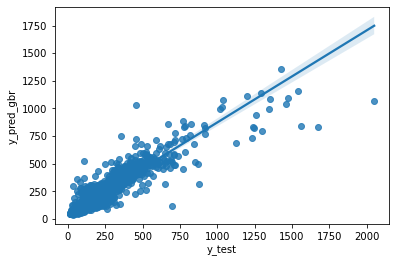

In [68]:
sns.regplot(x="y_test",y="y_pred_gbr",data=df_y_gbr)

# 8. Hyperparameter Tuning - GridSearchCV

In [87]:
params = {
    'learning_rate': [0.1,0.3,0.5],
    'n_estimators': [100,200,400],
    'subsample':[0.8,0.4,0.2,0.1],
    'max_depth':[4,6,8]
}

In [88]:
gbr_gscv = GridSearchCV(estimator=gbr,param_grid=params,cv=5,n_jobs=-1)
gbr_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 400],
                         'subsample': [0.8, 0.4, 0.2, 0.1]})

In [89]:
best_params = gbr_gscv.best_params_
best_score = gbr_gscv.best_score_
best_estimator = gbr_gscv.best_estimator_

print("Best parameters: ",best_params)
print("Best score: ",best_score)
print("Best estimator: ",best_estimator)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best score:  0.8975485542360412
Best estimator:  GradientBoostingRegressor(max_depth=6, subsample=0.8)


In [91]:
y_pred_gbr_gscv = gbr_gscv.predict(X_test)

<AxesSubplot:xlabel='y_test', ylabel='y_pred_gbr'>

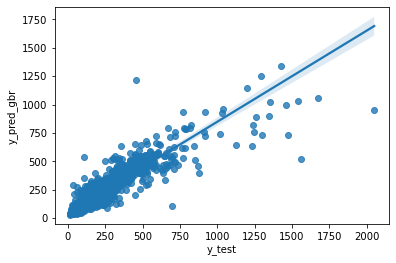

In [92]:
d_gbr_gscv = {'y_test':y_test,'y_pred_gbr':y_pred_gbr_gscv}
df_y_gbr_gscv = pd.DataFrame(data=d_gbr_gscv)

df_y_gbr_gscv = df_y_gbr_gscv.reset_index().drop(labels=['index'],axis=1)
df_y_gbr_gscv

sns.regplot(x="y_test",y="y_pred_gbr",data=df_y_gbr_gscv)

# 8. Using Other Model : Random Forest Regressor

In [94]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
y_pred_rfg = rfg.predict(X_test)

### Mean Squared Error

In [96]:
print("MSE dari baseline model random forest regressor : ",mean_squared_error(y_test,y_pred_rfg))

MSE dari baseline model random forest regressor :  2744.7127585961734


### Mean Absolute Error

In [98]:
print("MAE dari baseline model random forest regressor : ",mean_absolute_error(y_test,y_pred_rfg))

MAE dari baseline model random forest regressor :  31.46072829244144


In [99]:
print("R-Square dari baseline model random forest regressor : ",r2_score(y_test,y_pred_rfg))

R-Square dari baseline model random forest regressor :  0.8653610008970571


#### Polynomial Features on Random Forest Regressor

In [101]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

rfg_poly = RandomForestRegressor()
rfg_poly.fit(X_train_poly,y_train)

RandomForestRegressor()

In [102]:
X_test_poly = poly.transform(X_test)
y_pred_rfg_poly = rfg_poly.predict(X_test_poly)

In [103]:
print(r2_score(y_test,y_pred_rfg_poly))

0.8373819610284992


# 9. Using Other Model : Ridge

In [111]:
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train,y_train)

Ridge()

In [112]:
y_pred_ridge = ridge_regression.predict(X_test)

In [113]:
print(r2_score(y_test,y_pred_ridge))

0.8205213376384071


# 10. Using Other Model : Lasso

In [115]:
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train,y_train)

Lasso()

In [116]:
y_pred_lasso = lasso_regression.predict(X_test)

In [117]:
print(r2_score(y_test,y_pred_lasso))

0.7846346683630994


# 11. Conclusion

Dari seluruh model baseline, hasil evaluasi menunjukkan bahwa gradient boosting regressor memberikan evaluation score yang lebih baik dibandingkan model lainnya, sehingga kita coba hyperparameter tuning pada model ini, dan dihasilkan juga hasil sebesar 89,7% untuk r-square setelah dilakukan hyperparamter tuning dengan parameter sebagai berikut :

Best parameters:  
    'learning_rate': 0.1, 
    'max_depth': 6, 
    'n_estimators': 100, 
    'subsample': 0.8

Tentunya, hasil ini merupakan hasil yang dapat menghasilkan angka yang lebih baik dari ini dengan memanfaatkan hyperparameter tuning lainnya yang terkandung pada gradient boosting regressor